In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True
from scipy import integrate as nt
#from scipy.special import erf

In [2]:

# this is from Esirkepov PRL 2006

a0 = 0.5 # driver pulse field strength
tp = 2*(pi/2) # driver pulse duration
gammap = 8 # wake phase velocity Lorentz factor
mu = 1836 # ion mass (in m_e)


In [3]:
def a_laser(xi,a0,tp): # definition of laser envelope
    a = a0*np.exp(-4.0*np.log(2.0)*xi**2/tp**2)
    return a

In [4]:
Npoints = 5000;
xi_min = -6.0*pi;
xi_max = 2.0*pi;
xi = np.linspace(xi_min,xi_max,Npoints)
dxi=xi[2] - xi[1]

In [5]:
# calculate wakefield

betap = np.sqrt(1.0-1.0/gammap**2)
E = 0.0*xi #electric field
rho = E + 1.0  #charge density
phi = 0*xi # potential
a = a_laser(xi,a0,tp) # laser field envelope

for ii in np.arange((Npoints - 3),-1,-1):
    phi[ii]=-phi[ii+2]+2.0*phi[ii+1] + dxi**2*gammap**3*betap*((1 + phi[ii+1]) \
    *(gammap**2*(1 + phi[ii+1])**2 - 1.0 - a[ii+1]**2)**(-0.5) \
    - (mu - phi[ii+1])*(gammap**2*(mu-phi[ii+1])**2 - mu**2 - a[ii+1]**2)**(-0.5))
for ii in np.arange((Npoints - 3),-1,-1):
    E[ii+1] = 0.5*(phi[ii]-phi[ii+2])/dxi
    rho[ii+1] = rho[Npoints-1]+(phi[ii]+phi[ii+2]-2.0*phi[ii+1])/dxi**2


In [6]:
# calculate selection phase space orbits
Nlines = 12 # actual number displayed not same as this number
h0min = np.min(np.sqrt(1.0+a**2)/gammap-phi)
h0min = h0min*(1 + 0.01*np.sign(h0min))
h0max = 1.0/gammap + 1e-3*a0**2

h0l = np.linspace(h0min,h0max,Nlines)
dhl = h0l[2] - h0l[1]
h0min = h0max

h0max = 1.0/gammap + np.max(a**2/gammap - phi)

Nh0m = int((h0max-h0min)/dhl + 0.5)
h0m = np.linspace(h0min,h0max,Nh0m)
h0min = h0max
sqrtfunc = gammap**2.*(h0m[-1] + phi)**2 - (1.0 + a**2)
pxp_ = gammap**2*(h0m[-1]+phi)*betap + gammap*np.sqrt(sqrtfunc)
pxpmax = np.max(pxp_)
h0max = (np.sqrt(pxpmax**2 + 1) - betap*pxpmax)

h0u = np.linspace(h0min,h0max,Nlines)
h0 = np.concatenate((h0l,h0m,h0u), axis=0)

# remove duplicates
res = []
[res.append(x) for x in h0 if x not in res]
h0 = np.array(res)

Nlines = h0.size
pxp = np.zeros((xi.size,Nlines))
pxm = np.zeros((xi.size,Nlines))
for ii in np.arange(0,Nlines):
    sqrtfunc = gammap**2.*(h0[ii] + phi)**2 - (1.0 + a**2)
    
    pxp_ = gammap**2*(h0[ii] + phi)*betap + gammap*np.sqrt(np.abs(sqrtfunc))
    pxm_ = gammap**2*(h0[ii] + phi)*betap - gammap*np.sqrt(np.abs(sqrtfunc))
    
    # these take care of unphysical solutions
    pxp_[sqrtfunc<0.0] = float('NaN')
    pxm_[sqrtfunc<0.0] = float('NaN')
    pxp_[(h0[ii]+phi)<0.0] = float('NaN')
    pxm_[(h0[ii]+phi)<0.0] = float('NaN')
    pxp[:,ii] = pxp_
    pxm[:,ii] = pxm_
    



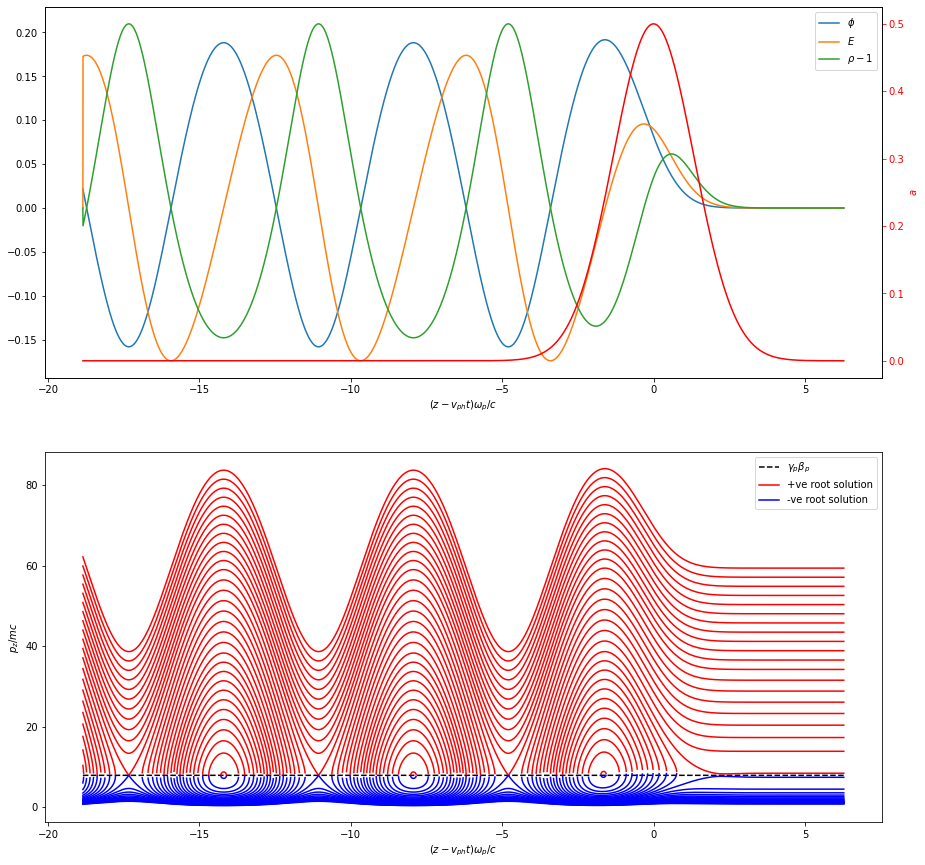

In [8]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(15,15))
ax1.plot(xi,phi,xi,E,xi,rho-1)
ax1.set_xlabel(r'$(z-v_{ph}t)\omega_p/c$')
ax1.legend((r'$\phi$',r'$E$',r'$\rho-1$'))
ax1yy = ax1.twinx()
ax1yy.plot(xi,a,'r')
ax1yy.tick_params(axis='y', color='r', labelcolor='r')
ax1yy.set_ylabel((r'$a$'),color='r')
p_p = gammap*betap
ax2.plot(xi,0*xi + p_p,'k--')
for ii in np.arange(0,Nlines):
    ax2.plot(xi,pxp[:,ii],'r-',xi,pxm[:,ii],'b-')
ax2.set_xlabel(r'$(z-v_{ph}t)\omega_p/c$')
ax2.set_ylabel(r'$p_z / mc$')


ax2.legend((r'$\gamma_p\beta_p$',r'+ve root solution',r'-ve root solution'))